In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df_CTD = pd.read_csv('CTD_Data.csv')

In [55]:
#Exploración de la informacion
df_CTD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Depth(m)         26 non-null     int64  
 1   Temperature(°C)  26 non-null     float64
 2   Salinity(psu)    26 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 752.0 bytes


In [56]:
df_CTD.describe()

,Depth(m),Temperature(°C),Salinity(psu)
count,26.000000,26.000000,26.000000
mean,711.923077,12.557692,34.511923
std,610.319714,9.626346,0.135026
min,20.000000,4.000000,34.150000
25%,156.250000,4.500000,34.475000
50%,570.000000,7.500000,34.555000
75%,1225.000000,22.125000,34.580000
max,1800.000000,29.500000,34.760000


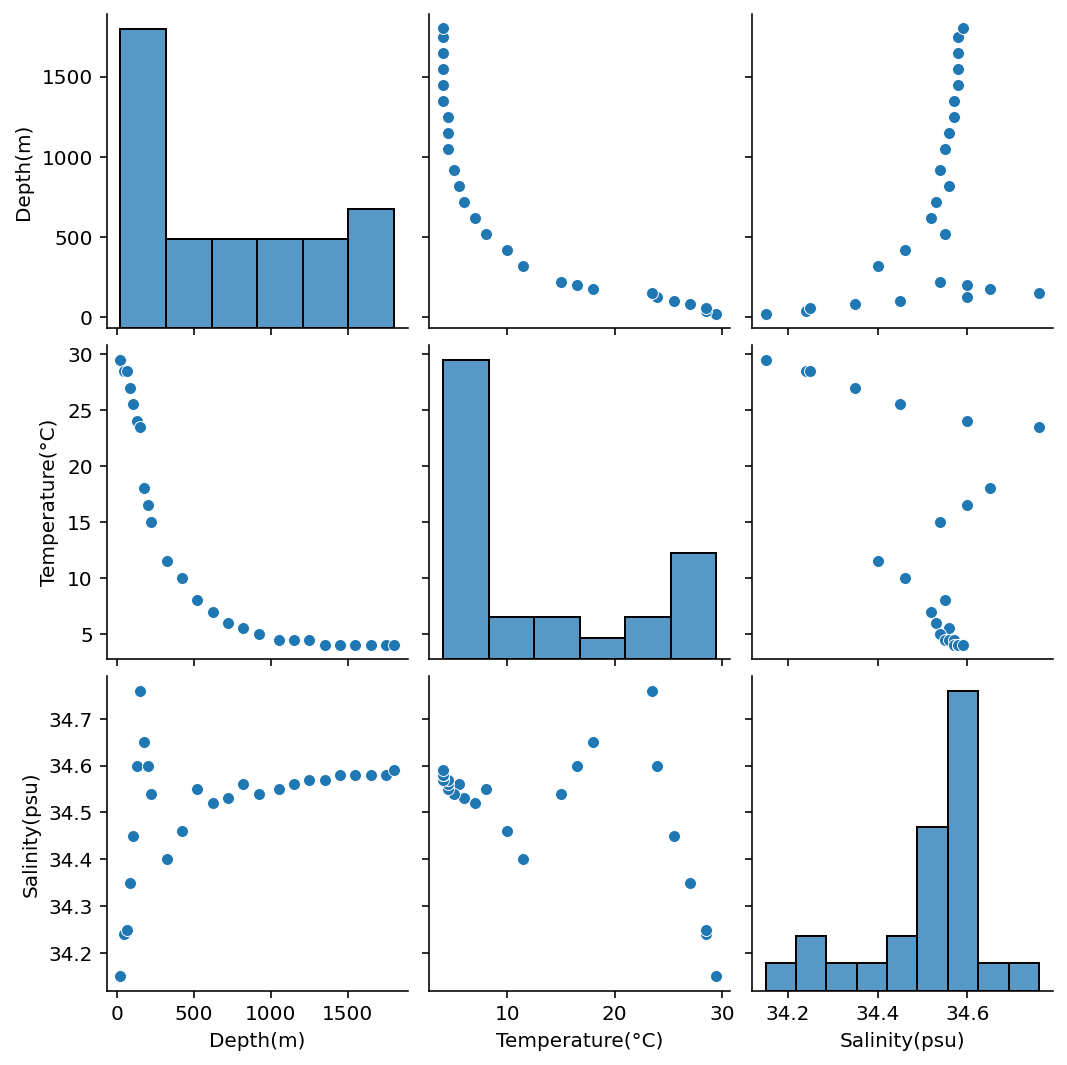

In [57]:
sns.pairplot(df_CTD);

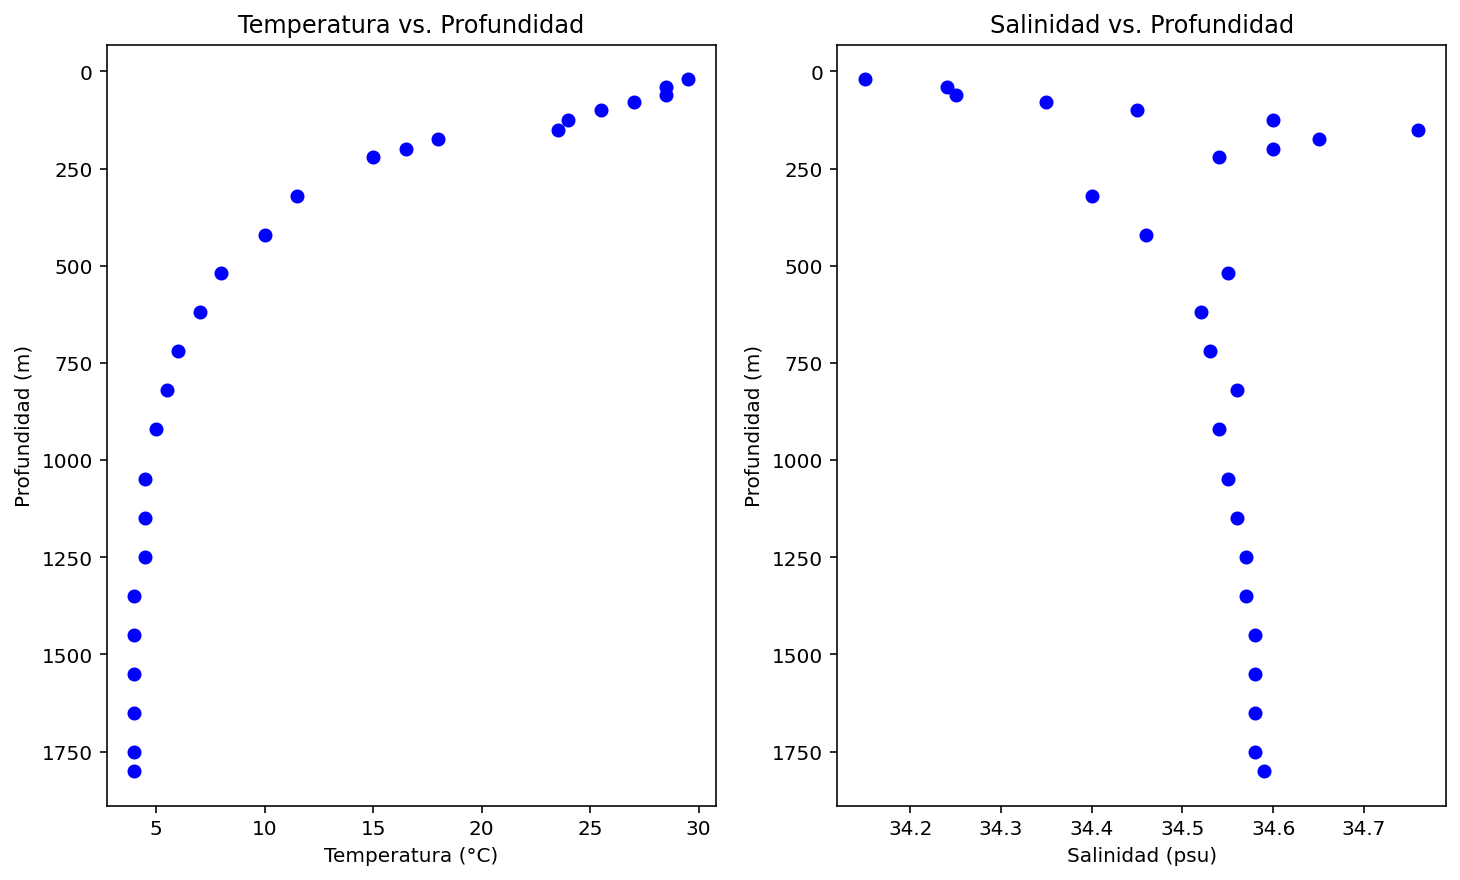

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes
ax0.scatter(df_CTD['Temperature(°C)'],df_CTD['Depth(m)'],c='b')
ax0.invert_yaxis()
ax1.scatter(df_CTD['Salinity(psu)'],df_CTD['Depth(m)'],c='b')
ax1.invert_yaxis()
ax0.set_title('Temperatura vs. Profundidad')
ax1.set_title('Salinidad vs. Profundidad');
ax0.set_ylabel('Profundidad (m)')
ax0.set_xlabel('Temperatura (°C)')
ax1.set_ylabel('Profundidad (m)')
ax1.set_xlabel('Salinidad (psu)');

In [59]:
df_CTD['Presión(bar)'] = list(map(lambda x: (x/10) + 1 , df_CTD['Depth(m)']))
df_CTD.head()

,Depth(m),Temperature(°C),Salinity(psu),Presión(bar)
0,20,29.5,34.15,3.0
1,40,28.5,34.24,5.0
2,60,28.5,34.25,7.0
3,80,27.0,34.35,9.0
4,100,25.5,34.45,11.0


In [60]:
def Kt(T,s,p):
    # Función Módulo de Compresibilidad Secante
    # Calcula el polinomio usando los parámetros entregados, y los envía a la función rho(T,s,p)
    base2 = [T**(0), T**(1), T**(2), T**(3), T**(4), T**(5)]
    E = sum([19652.21, 148.4206, -2.3271, 1.3604e-2, -5.1552e-5, 0]*np.transpose(base2))
    F = sum([54.6746, -0.6034, 1.0998e-2, -6.1670e-5, 0, 0]*np.transpose(base2))
    G = sum([7.944e-2, 1.6483e-2, -5.3009e-4, 0, 0, 0]*np.transpose(base2))
    H = sum([3.2399, 1.4371e-3, 1.1609e-4, -5.7790e-7, 0, 0]*np.transpose(base2))
    I = sum([2.2838e-3, -1.0981e-5, -1.6078e-6, 0, 0, 0]*np.transpose(base2))
    J = sum([1.9107e-4, 0, 0, 0, 0, 0]*np.transpose(base2))
    M = sum([8.5093e-5, -6.1229e-6, 5.2787e-7, 0, 0, 0] *np.transpose(base2))
    N = sum([-9.9348e-7, 2.0816e-8, 9.1697e-10, 0, 0, 0] *np.transpose(base2))
    Kt = E + F*s + G*s**(1.5) + (H + I*s + J*s**(1.5))*p + (M + N*s)*p**(2)
    return Kt

In [61]:
# Función Densidad del océano, la cual la calcula a partir de T(°C), s(psu) y p(bar)
# La función rho(T,s,p) calcula la densidad del agua de mar
# a partir de la aproximación empírica de UNESCO del año 1981
# Utilice T(Celsius), s(psu), p(bar)
# Salida en unidades SI [kg/m^3]
def rho(T,s,p):
    base = [T**(0), T**(1), T**(2), T**(3), T**(4), T**(5)]
    A = sum([999.8425, 6.7939e-2, -9.0952e-3, 1.0016e-4, -1.12e-6, 6.53e-9] *np.transpose(base))
    B = sum([8.2449e-1, -4.0899e-3, 7.6438e-5, -8.2467e-7, 5.3875e-9, 0] *np.transpose(base))
    C = sum([-5.7246e-3, 1.0227e-4, -1.6546e-6, 0, 0, 0] *np.transpose(base))
    D = sum([4.8314e-4, 0, 0, 0, 0, 0] *np.transpose(base))
    if p == 0:
        rho = A + B*s + C*s**(1.5) + D*s**(2);
    else:
        rho = (A + B*s + C*s**(1.5) + D*s**(2))/(1-(p / Kt(T,s,p)));
    return rho


In [62]:
df_CTD['Compresibilidad']=list(map(lambda T,s,p:Kt(T,s,p), df_CTD['Temperature(°C)'], df_CTD['Salinity(psu)'], df_CTD['Presión(bar)']))

df_CTD['Compresibilidad']

0     23878.815198
1     23854.037813
2     23861.352294
3     23814.219633
4     23761.065033
5     23705.836409
6     23696.949813
7     23377.377375
8     23279.530936
9     23172.358359
10    22911.601638
11    22812.564237
12    22657.585547
13    22587.671364
14    22516.174605
15    22497.221573
16    22474.659594
17    22462.867841
18    22497.125882
19    22531.392216
20    22508.001896
21    22542.279698
22    22576.023575
23    22609.775067
24    22643.534176
25    22660.959757
Name: Compresibilidad, dtype: float64

In [63]:
df_CTD['Density(Kg/m3)']=list(map(lambda T,s,p:rho(T,s,p), df_CTD['Temperature(°C)'], df_CTD['Salinity(psu)'], df_CTD['Presión(bar)']))

df_CTD['Density(Kg/m3)']

0     1021.388752
1     1021.875382
2     1021.968506
3     1022.616443
4     1023.248271
5     1023.923083
6     1024.299590
7     1025.816624
8     1026.251156
9     1026.636859
10    1027.697429
11    1028.469071
12    1029.328288
13    1029.913260
14    1030.522338
15    1031.071090
16    1031.579178
17    1032.245820
18    1032.707560
19    1033.168323
20    1033.689880
21    1034.149874
22    1034.601055
23    1035.051278
24    1035.500547
25    1035.732645
Name: Density(Kg/m3), dtype: float64

Convertimos la densidad $kg/m^3$ a $g/cm^3$

In [64]:
df_CTD['Density(g/cm3)'] = list(map(lambda D:D*(1000/(100**3)), df_CTD['Density(Kg/m3)']))

# Graficamos Densidad vs. Profundidad

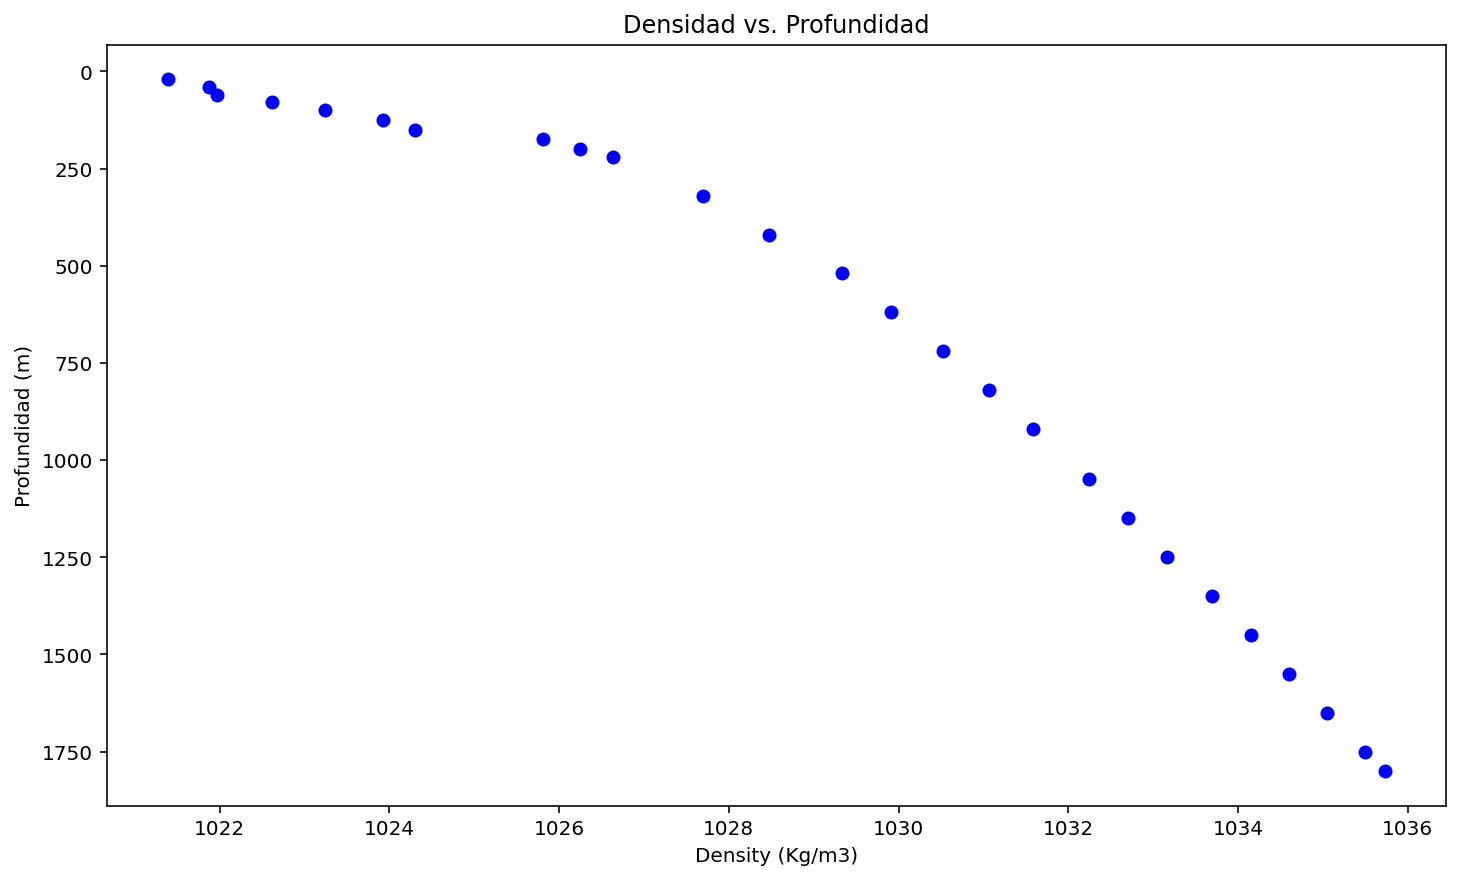

In [65]:
#plt.scatter(df_CTD['Density(g/cm3)'], df_CTD['Depth(m)'], c='b') #Descomente para graficar g/cm^3
plt.scatter(df_CTD['Density(Kg/m3)'], df_CTD['Depth(m)'], c='b')
ax = plt.gca()
ax.invert_yaxis()
ax.set_title('Densidad vs. Profundidad')
ax.set_ylabel('Profundidad (m)')
#ax.set_xlabel('Density (g/cm3)') #Descomente para graficar g/cm^3
ax.set_xlabel('Density (Kg/m3)');

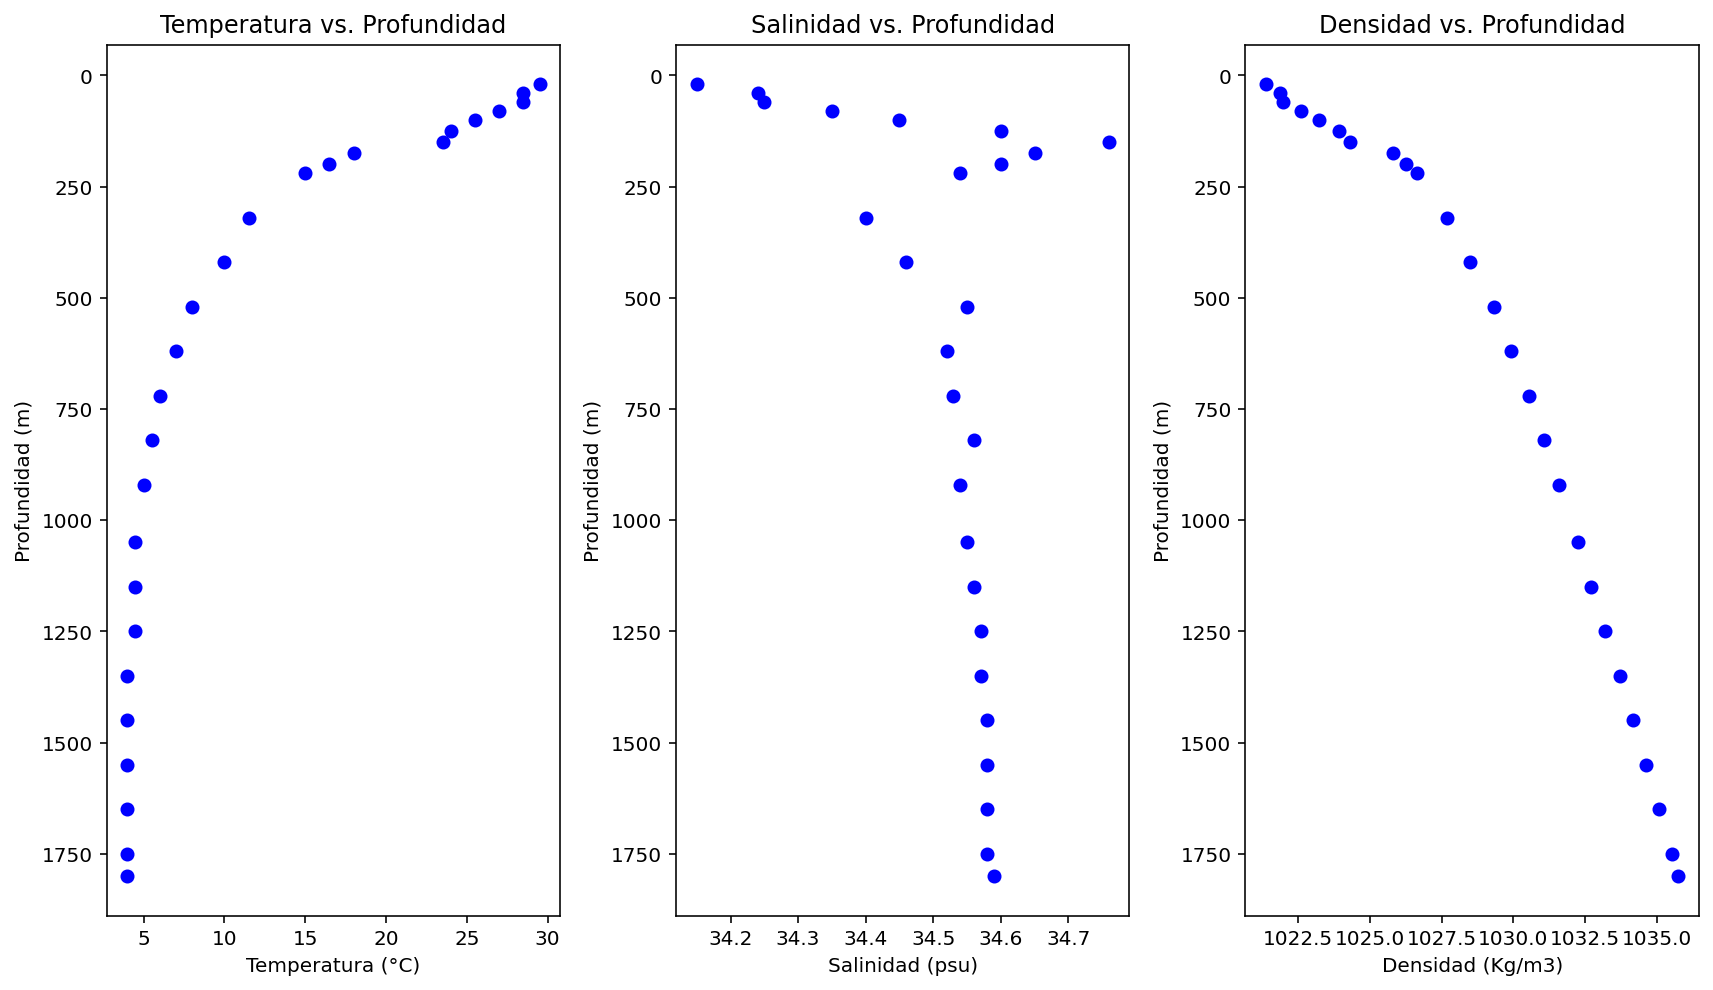

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=3)
ax0, ax1, ax2 = axes
ax0.scatter(df_CTD['Temperature(°C)'],df_CTD['Depth(m)'],c='b')
ax0.invert_yaxis()
ax1.scatter(df_CTD['Salinity(psu)'],df_CTD['Depth(m)'],c='b')
ax1.invert_yaxis()
ax2.scatter(df_CTD['Density(Kg/m3)'],df_CTD['Depth(m)'],c='b')
ax2.invert_yaxis()
ax0.set_title('Temperatura vs. Profundidad')
ax1.set_title('Salinidad vs. Profundidad')
ax2.set_title('Densidad vs. Profundidad')
ax0.set_ylabel('Profundidad (m)')
ax0.set_xlabel('Temperatura (°C)')
ax1.set_ylabel('Profundidad (m)')
ax1.set_xlabel('Salinidad (psu)')
ax2.set_ylabel('Profundidad (m)')
ax2.set_xlabel('Densidad (Kg/m3)')
fig.tight_layout();